In [281]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [282]:
from sklearn.model_selection import train_test_split


df = pd.read_csv("../data/train.csv")
train_df, test_df = train_test_split(df, random_state=23, test_size=0.2)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Missing Values

In [290]:
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].copy()


In [297]:
for col in null_df.select_dtypes(include='object').columns:
	print(null_df[col].value_counts(dropna=False))
	print()

Alley
NoAlley    1369
Grvl         50
Pave         41
Name: count, dtype: int64

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

BsmtQual
TA           649
Gd           618
Ex           121
NoBsmtAvl     37
Fa            35
Name: count, dtype: int64

BsmtCond
TA           1311
Gd             65
Fa             45
NoBsmtAvl      37
Po              2
Name: count, dtype: int64

BsmtExposure
No           953
Av           221
Gd           134
Mn           114
NoBsmtAvl     38
Name: count, dtype: int64

BsmtFinType1
Unf          430
GLQ          418
ALQ          220
BLQ          148
Rec          133
LwQ           74
NoBsmtAvl     37
Name: count, dtype: int64

BsmtFinType2
Unf          1256
Rec            54
LwQ            46
NoBsmtAvl      38
BLQ            33
ALQ            19
GLQ            14
Name: count, dtype: int64

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

FireplaceQu
Gd  

In [ ]:
cat_null_cols = null_df.select_dtypes(include='object').columns
num_null_cols = null_df.select_dtypes(include='number').columns


bsmt_null_cols = cat_null_cols[cat_null_cols.str.contains('Bsmt')]
garage_null_cols = cat_null_cols[cat_null_cols.str.contains('Garage')]


dict = {
    'Alley': 'NoAlley',
    'Electrical': df.Electrical.mode()[0],
    'FireplaceQu': df.FireplaceQu.mode()[0],
    'Fence': 'NoFence',
    'MiscFeature': 'None',
    'PoolQC': 'NoPool',
    'MasVnrType': 'None',
    **{bsmt_col: 'NoBsmtAvl' for bsmt_col in bsmt_null_cols},
    **{garage_col: 'NoGarageAvl' for garage_col in garage_null_cols},
    **{num_col: int(null_df[num_col].mean()) for num_col in num_null_cols}
}


null_df.fillna(dict, inplace=True)
df.update(null_df) # No Missing Value left data is fully cleansed

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [100]:
null_df.mean(numeric_only=True)

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [298]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.681507,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.478082,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569120,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994863,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# df.select_dtypes(include='number')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
df[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']] = df[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].astype('object')

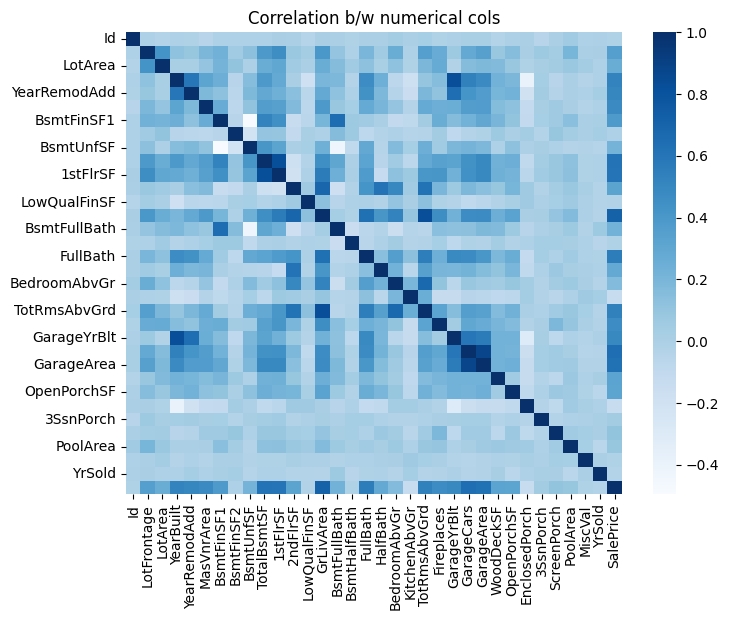

In [18]:

hn =  df.select_dtypes(include='number').corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hn, cmap='Blues', ax=ax)
plt.title('Correlation b/w numerical cols')
plt.show()

In [19]:
cors = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).to_frame()

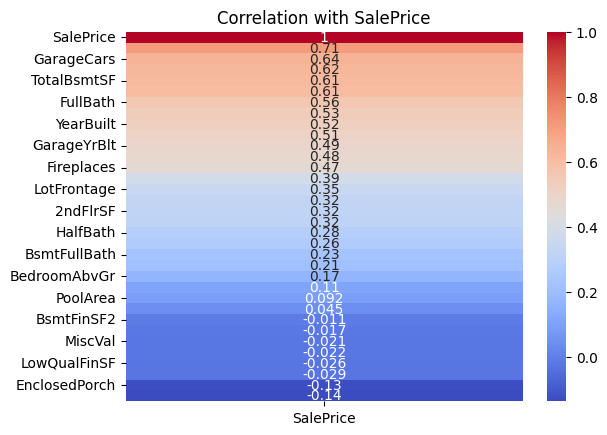

In [20]:
# Plot heatmap
sns.heatmap(cors, annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

In [21]:
imp_num_cols = cors.query("SalePrice > 0.6") #columns(features) highly correlated to SalePrice
imp_num_cols.iloc[1:-1]

,SalePrice
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581


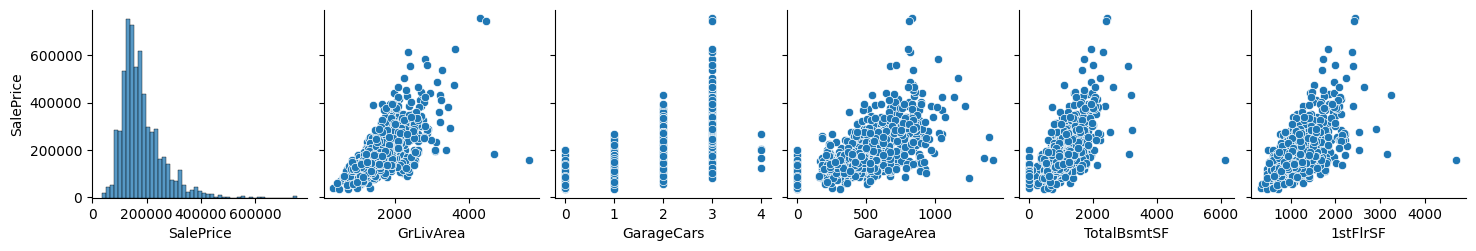

In [22]:
#fig, ax = plt.subplots(figsize=(18,10))
g = sns.pairplot(df, y_vars='SalePrice', x_vars=imp_num_cols.index, kind='scatter')


<Axes: xlabel='SalePrice', ylabel='Count'>

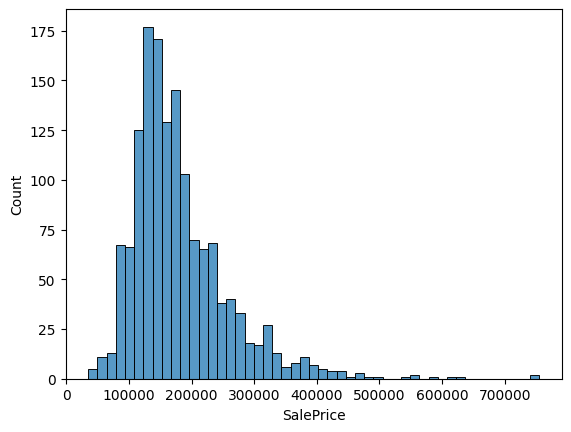

In [23]:
sns.histplot(df['SalePrice'])

In [24]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [25]:
df_cat = df.select_dtypes(include=['object', 'category'])
cat_cols = df_cat.columns.tolist()

In [ ]:
n_cols = 4
n_rows = (len(cat_cols) // n_cols + 1)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(cat_cols):
	ax = axes[i // n_cols, i % n_cols] if len(cat_cols) > n_cols else axes[i]
	sns.boxplot(x=col, y='SalePrice', data=df, ax=ax)
	ax.set_title(f'Price by {col}')
	ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
	fig.delaxes(axes.flatten()[j])
	

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

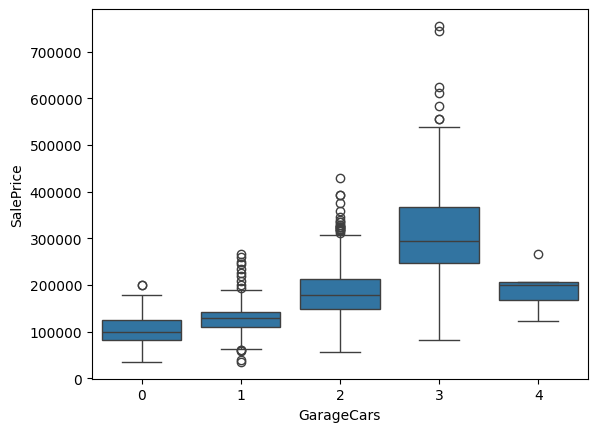

In [ ]:
sns.boxplot(x=df.GarageCars, y=df.SalePrice)

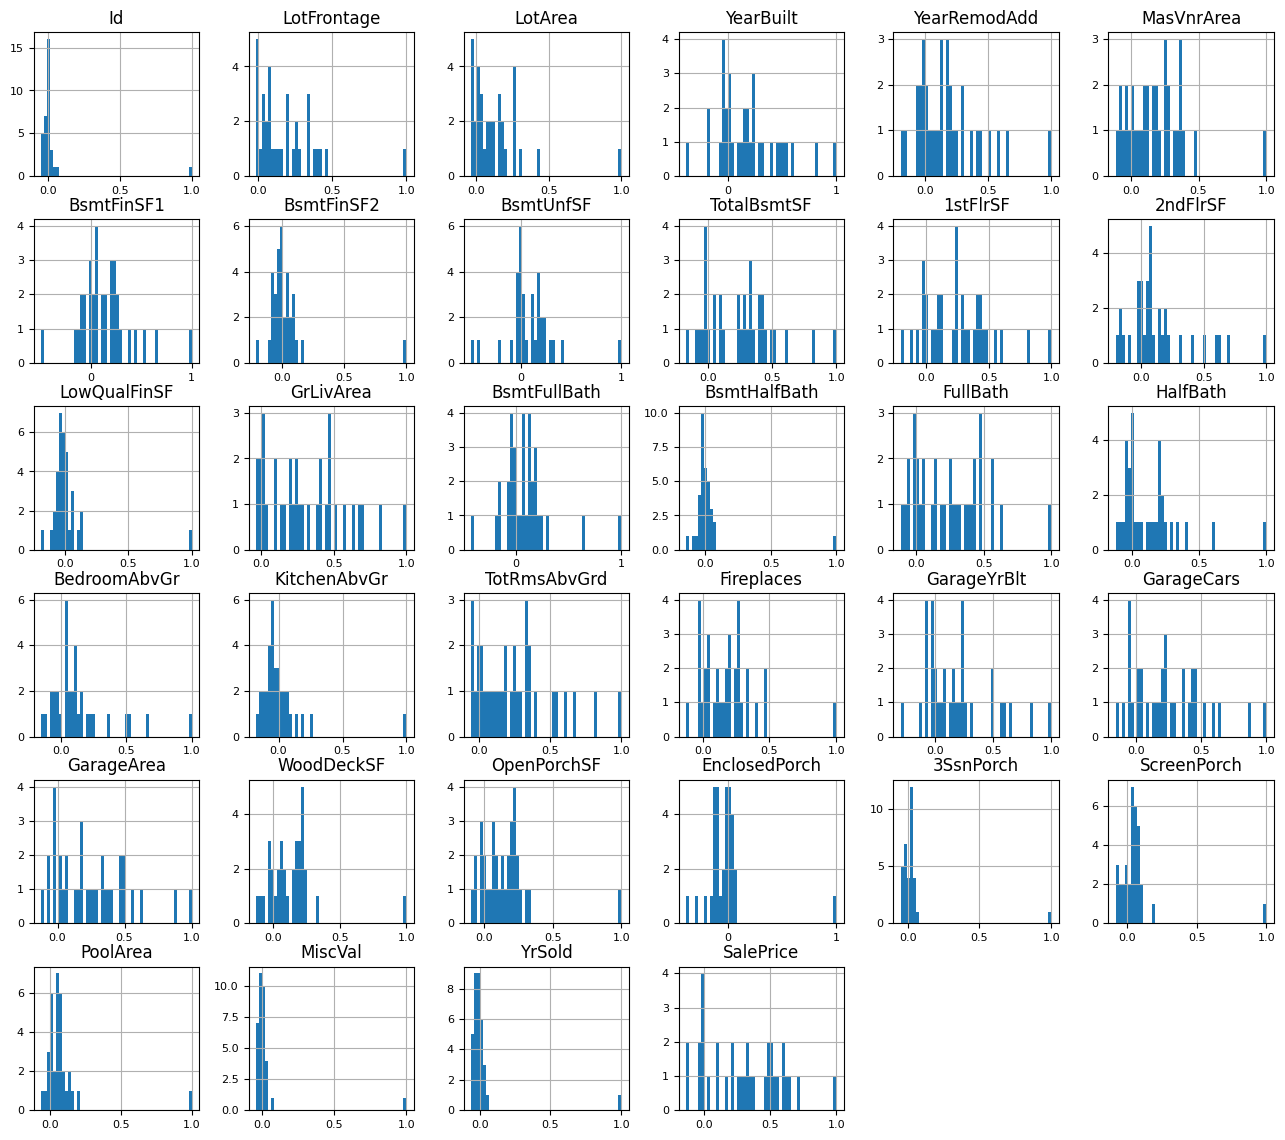

In [ ]:
hn.hist(figsize=(16, 14), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
x = df[imp_num_cols.drop('SalePrice').index]
y = df.iloc[:, -1]

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=x, y=y)

LinearRegression()

In [ ]:
# test_df = pd.read_csv("/home/tesserxt/AllProjects/jupyter/campusx/content/house_price/test.csv")
# imp_test_df = test_df[imp_num_cols.drop('SalePrice').index]
# imp_test_df[imp_test_df.isna().any(axis=1)]
# imp_test_df.fillna(imp_test_df.mean(), inplace=True)




In [ ]:
# y_pred = lr.predict(imp_test_df)
from sklearn.metrics import r2_score

# r2_score(y_pred=y_pred, y_true=test_df.SalePrice)

In [ ]:
test_file_path = "/home/tesserxt/AllProjects/jupyter/campusx/content/house_price/test.csv"
test_df = pd.read_csv(test_file_path)
test_data = test_df[imp_num_cols.drop("SalePrice").index]
test_data.fillna(test_data.mean(), inplace=True)
test_data.isnull().sum().sort_values(ascending=False)
ids = test_df.pop('Id')
preds = lr.predict(test_data)
	
output = pd.DataFrame({'Id': ids,
					   'SalePrice': preds.squeeze()})

output.to_csv('submission.csv', index=False)

/tmp/ipykernel_21057/62917513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(test_data.mean(), inplace=True)


# Insurance dataset

In [ ]:
df = pd.read_csv("/home/tesserxt/AllProjects/jupyter/campusx/content/insurance_data.csv")
# df['gender'] = df['gender'].map({'male': 1, 'female': 0}).astype('UInt8')
# df['diabetic'] = df['diabetic'].map({'Yes': 1, 'No': 0}).astype('UInt8')
# df['smoker'] = df['smoker'].map({'Yes': 0, 'No': 1}).astype('UInt8')

# region_map = {'southeast': 0, 'northeast': 1, 'northwest': 2, 'southwest': 3}
# df['region'] = df['region'].map(region_map).astype('UInt8')
# df.insert(len(df.columns) - 1, 'bmi_category', df['bmi'].apply(categorize_bmi))
# df.dropna(inplace=True, ignore_index=True)

In [ ]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [ ]:
X = df.iloc[:,[2,3,5,6,7,8,9,10]]
y = df.iloc[:, -1]
X

,age,gender,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,91,Yes,0,No,southeast,1121.87
1,24.0,male,87,No,0,No,southeast,1131.51
2,NaN,male,82,Yes,0,No,southeast,1135.94
3,NaN,male,80,No,0,No,northwest,1136.40
4,NaN,male,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...
1335,44.0,female,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,120,No,1,Yes,northeast,58571.07
1337,30.0,male,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,106,No,0,Yes,southeast,62592.87


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1072, 8) (268, 8) (1072,) (268,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pd.Series(lr.coef_, index = X.columns)

ValueError: could not convert string to float: 'male'

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
	r2_score(y_pred=y_pred, y_true=y_test)
)

0.7125382714829096


In [ ]:
y_test

727     10450.55
479      6781.35
240      3756.62
422      6082.41
49       1719.44
          ...   
1301    47305.31
575      8232.64
953     14394.56
1098    23241.47
170      2803.70
Name: claim, Length: 265, dtype: float64

In [ ]:
y_pred

array([ 8251.12883441,  7642.21538973,  7239.50494629, 12763.84066988,
       21010.91182639, 11402.39450348,  8916.07375055,  8906.0693182 ,
        5545.63919145,  8140.14339486, 10043.30191697,  9114.39929767,
       32782.64192521, 12566.71026612, 12693.25706458, 26882.48194831,
        6202.40187214,  6684.03512896, 12188.19118819, 10583.8599176 ,
        6395.44036482,  6667.50344143,  5996.10834574, 28352.82493919,
        8111.97703105, 14738.95507104,  7463.73924519,  9545.17482099,
        6542.72118973,  9571.32717881, 12601.25043918,  8793.9188241 ,
       12337.91886675, 25478.01017727,  6992.40618877,  9062.16960498,
       40597.34392548, 11216.17427815, 11776.85052451, 38410.58893443,
       37077.85188347, 14043.40796037, 30847.41179327,  7336.31056239,
       11003.63495097, 36694.64718184, 10852.76907002,  9775.18617644,
       12423.11746881,  9639.91044127, 31776.91485593,  5461.79108888,
        4313.11934983,  8336.97933252, 12992.21558794,  7672.55697385,
      